In [8]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ,execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-05-04 10:58:23,578: Credentials are already in use. The existing account in the session will be replaced.


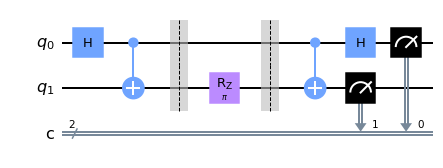

In [14]:
vote = [0,1,0,0,0]
n = 5
T = int(1 + np.ceil(np.log(n)))
t = 0
Res = 0
qc = QuantumCircuit(2,2)
while(t<T and not Res):
    qc.h(0)
    qc.cx(0,1)
    qc.barrier()
    
    for i in vote:
        if i:
            qc.rz((np.pi)/(2**t),1)     
    qc.barrier()
    qc.cx(0,1)
    qc.h(0)
    qc.measure(range(2),range(2))
    backend = Aer.get_backend('qasm_simulator')
    job_simulator = execute(qc,backend,shots=1024)
    results = job_simulator.result()
    count = results.get_counts(qc)
    # print(t,count)
    t+=1
    if len(count)==1 and '01' in count:
        Res = 1
qc.draw()

In [13]:
print(t)
print(Res)

2
1


In [11]:
if Res:
    print('Vetoed')
else:
    print('Passed')

Vetoed
